In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction/Churn.csv


In [2]:
#Reading the file into a dataframe
df = pd.read_csv('/kaggle/input/churn-prediction/Churn.csv')

In [3]:
#Checking the first few raws of the data set
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Checking the columns names 
print(df.columns)

#Check number of raws in the data
df.shape

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#checking the values of each column
df.nunique()#[df.nunique() == 2]

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
# Identifying the values of each column, separating the columns into 2 lists (Discrete and Continuous)
disc = 0
cont = 0
disc_list = []
cont_list = []

for x, i in df.nunique()[1: ].iteritems():
    if i > 5:
        cont += 1
        cont_list.append(x)
    else:
        disc += 1
        disc_list.append(x)
# ===================================
disc, cont, disc_list, cont_list

print(f'Number of discrete columns in the dataset {disc}')
print('=' * 100)
print(f'Number of continues columns in the dataset {cont}')
print('=' * 100)
print(f'List of discrete columns in the dataset {disc_list}')
print('=' * 100)
print(f'List of continues columns in the dataset {cont_list}')
print('=' * 100)

Number of discrete columns in the dataset 17
Number of continues columns in the dataset 3
List of discrete columns in the dataset ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
List of continues columns in the dataset ['tenure', 'MonthlyCharges', 'TotalCharges']


**Note** 1
<br>
1. The dataset contains 7043 unique customers
2. There are 21 columns in the dataset
    - Column `customerID` : Unique identifier 
    - Columns `Churn` : Target Variable
    - 19 columns : Predicator variables 
        - 16 columns with discrete values
        - 3 columns wuth continues values

**Exploring Dataset Attributes !**

1. What are the values of the discrete columns?
2. How are the values in each discrete parameter ranked?
3. What are the values of the continuos columns?
4. How are the values in each continuos parameter distributed?

gender
        gender    ratios
Male      3555  0.504756
Female    3488  0.495244
SeniorCitizen
   SeniorCitizen    ratios
0           5901  0.837853
1           1142  0.162147
Partner
     Partner    ratios
No      3641  0.516967
Yes     3402  0.483033
Dependents
     Dependents    ratios
No         4933  0.700412
Yes        2110  0.299588
PhoneService
     PhoneService    ratios
Yes          6361  0.903166
No            682  0.096834
MultipleLines
                  MultipleLines    ratios
No                         3390  0.481329
Yes                        2971  0.421837
No phone service            682  0.096834
InternetService
             InternetService    ratios
Fiber optic             3096  0.439585
DSL                     2421  0.343746
No                      1526  0.216669
OnlineSecurity
                     OnlineSecurity    ratios
No                             3498  0.496663
Yes                            2019  0.286668
No internet service            1526  0.216669
OnlineB

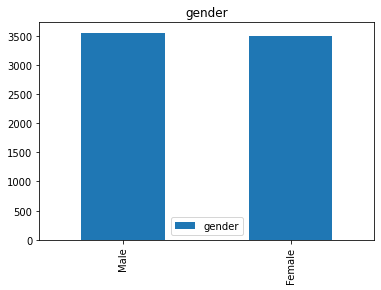

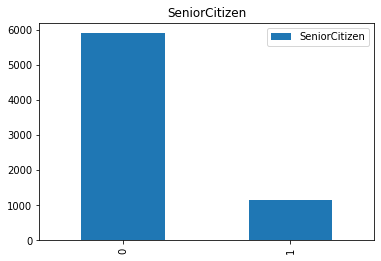

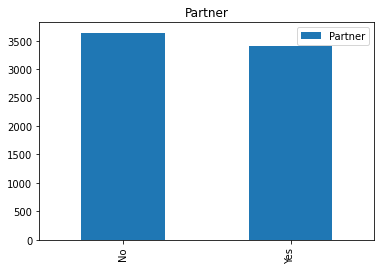

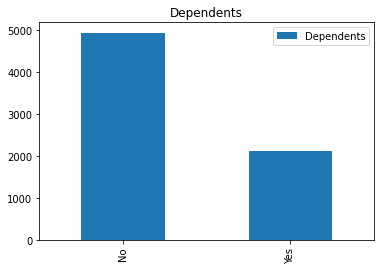

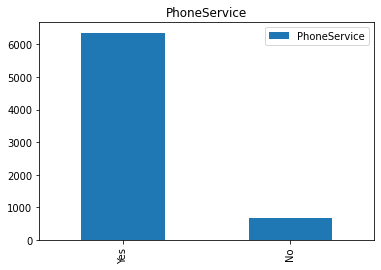

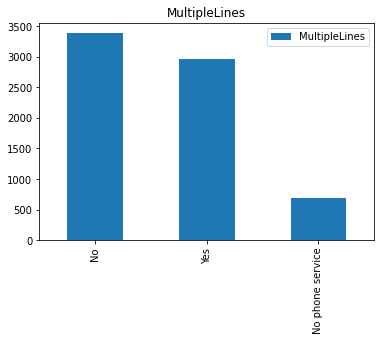

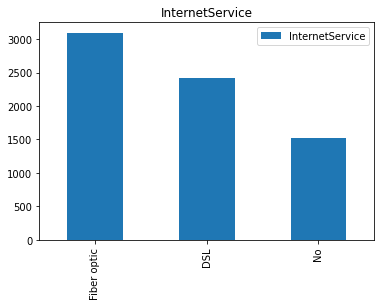

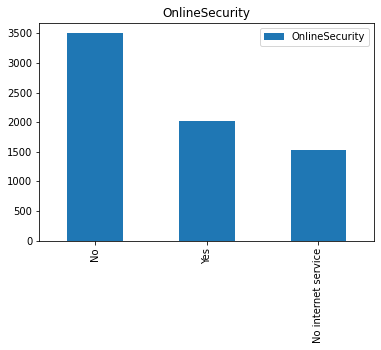

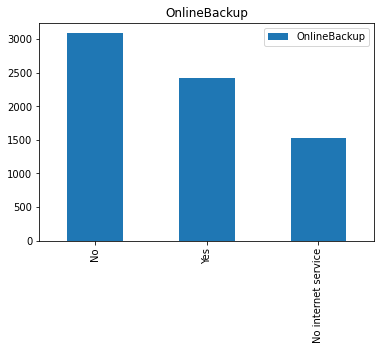

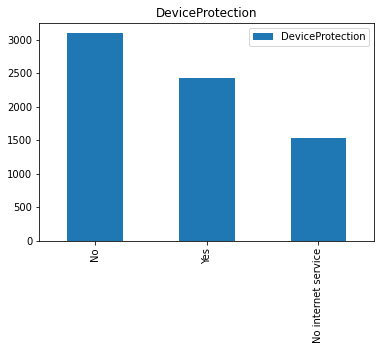

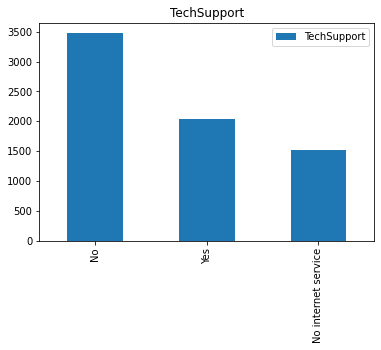

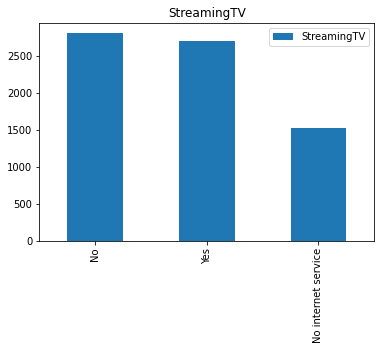

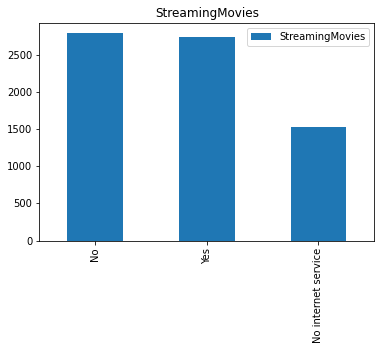

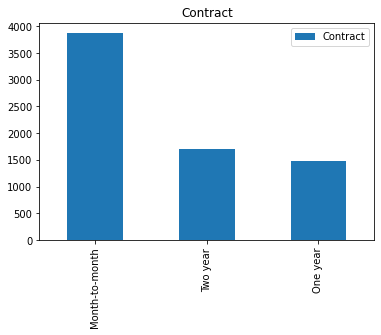

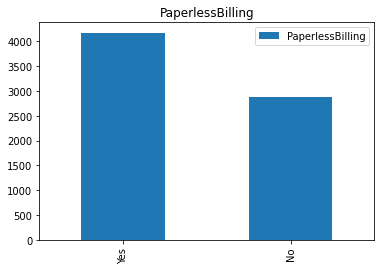

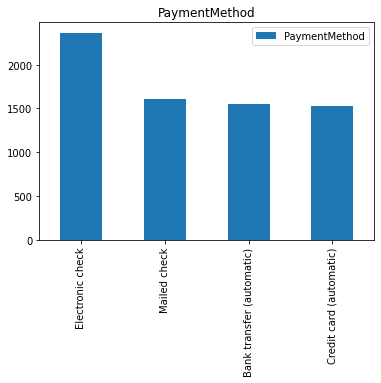

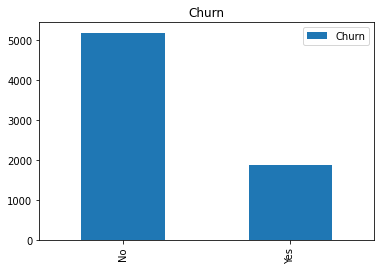

In [11]:
# 

for val in disc_list:
    vals_counts = pd.DataFrame(df[val].value_counts())
    vals_counts.plot(kind='bar');
    plt.title(val)
    vals_counts['ratios'] = vals_counts[val] / vals_counts[val].sum()
    print(val)
    print(vals_counts)
    print('=' * 100)
    

In [12]:
# inestigating values of column TotalCharges
missing_values_TotalCharges= df.TotalCharges.sort_values()[:11].index

#There are 11 missing values in column TotalCharges 
df.TotalCharges.sort_values().head(12)



936          
3826         
4380         
753          
5218         
3331         
6754         
6670         
1340         
488          
1082         
105     100.2
Name: TotalCharges, dtype: object

In [13]:
#droping missing values from column TotalCharges

df = df.drop(missing_values_TotalCharges, axis=0)

In [14]:
#change TotalCharges column type from object to float 
df['TotalCharges'] = df['TotalCharges'].astype('float')

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


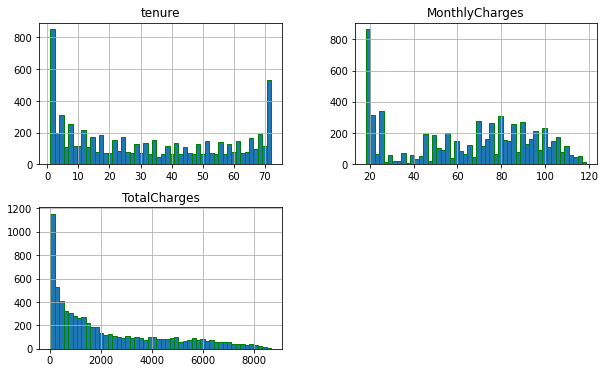

In [15]:
df[cont_list].hist(figsize=[10, 6], bins=50, edgecolor='g');
df[cont_list].describe()

In [16]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


<h1>Data Cleaning</h1>

In [17]:
#identify cols where we apply value transformation to binary (0, 1) 

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

#pd.get_dummies(df[cols[0]], prefix=str(cols[0]))

df1=pd.DataFrame()
for i in cols:
    dummies = pd.get_dummies(df[i], prefix=str(i))
    
    for x in dummies.columns:
        df1[x] = dummies[x]


In [18]:
# Isolating relavant parameters 
vars_keep = []
vars_delete = []
    
for word in df1.columns:
    if '_No' in word:
        vars_delete.append(word)
    else:
        vars_keep.append(word)

In [19]:
#Creating new dataframe and compiling all the relavant parameters

df2 = df1[vars_keep].copy()
#df2['customerID'] = df['customerID']
df2['tenure'] = df['tenure']
df2['MonthlyCharges'] = df['MonthlyCharges']
df2['TotalCharges'] = df['TotalCharges']

df2.drop(['gender_Female', 'SeniorCitizen_0'], inplace=True, axis = 1)

In [20]:
df2.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,34,56.95,1889.50
2,1,0,0,0,1,0,1,0,1,1,...,0,1,0,0,0,1,1,2,53.85,108.15
3,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,2,70.70,151.65


<h2> Calculating Average churn per parameter </h2>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


,col_names,mean_churn_1,mean_churn_1_upper_limit,mean_churn_1_lower_limit,mean_churn_0,mean_churn_0_upper_limit,mean_churn_0_lower_limit,diff_means,diff_means_upper_limit,diff_means_lower_limit
0,gender_Male,0.262046,0.290,0.235,0.269595,0.297,0.242000,-0.007550,0.031000,-0.046000
1,SeniorCitizen_1,0.416813,0.448,0.387,0.236503,0.262,0.211000,0.180310,0.221025,0.139975
2,Partner_Yes,0.197171,0.222,0.172,0.329761,0.359,0.301000,-0.132590,-0.094000,-0.170000
3,Dependents_Yes,0.155312,0.178,0.133,0.312791,0.341,0.284000,-0.157479,-0.120000,-0.194000
4,PhoneService_Yes,0.267475,0.295,0.241,0.250000,0.277,0.224000,0.017475,0.055000,-0.020000
5,MultipleLines_Yes,0.286485,0.314,0.258,0.250677,0.278,0.224000,0.035808,0.073000,-0.003000
6,InternetService_DSL,0.189983,0.215,0.166,0.305459,0.333,0.277000,-0.115476,-0.078000,-0.152000
7,InternetService_Fiber optic,0.418928,0.450,0.388,0.145325,0.167,0.124000,0.273602,0.311000,0.237000
8,OnlineSecurity_Yes,0.146402,0.169,0.125,0.313733,0.343,0.285000,-0.167331,-0.131000,-0.202000
9,OnlineBackup_Yes,0.215670,0.241,0.190,0.292164,0.320,0.264000,-0.076494,-0.039000,-0.115000


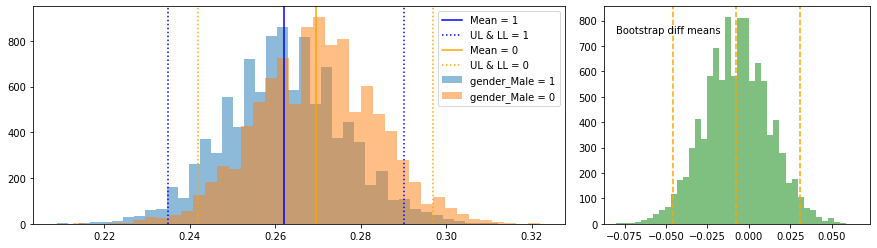

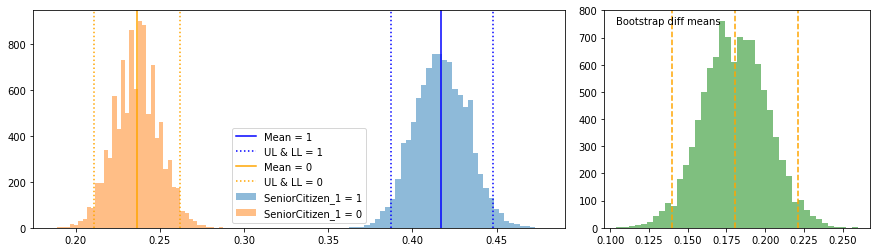

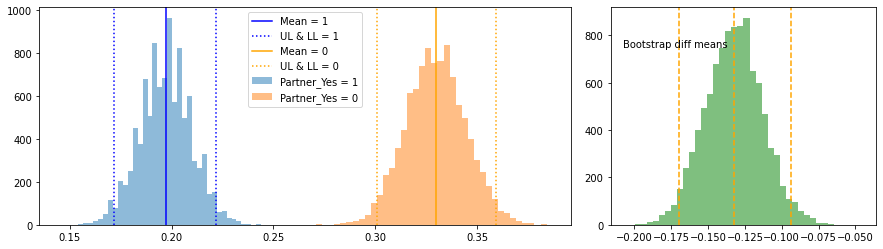

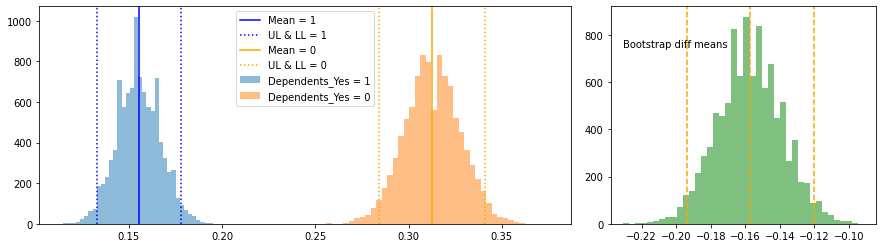

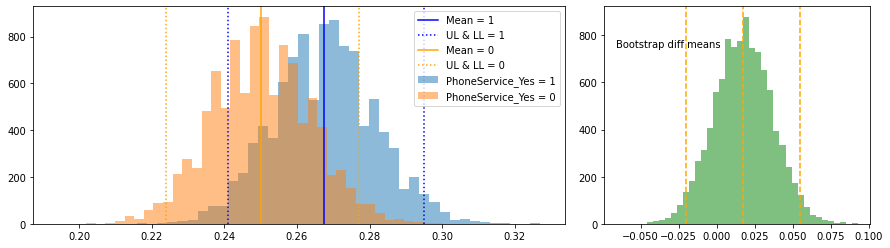

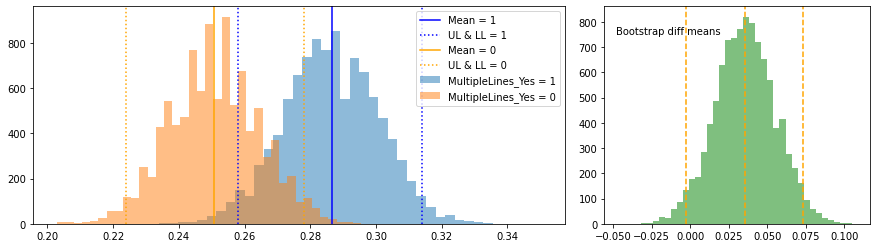

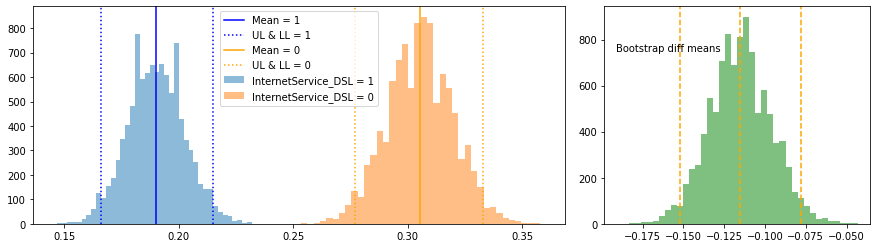

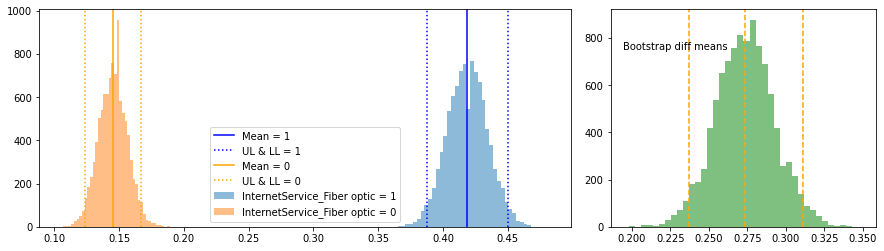

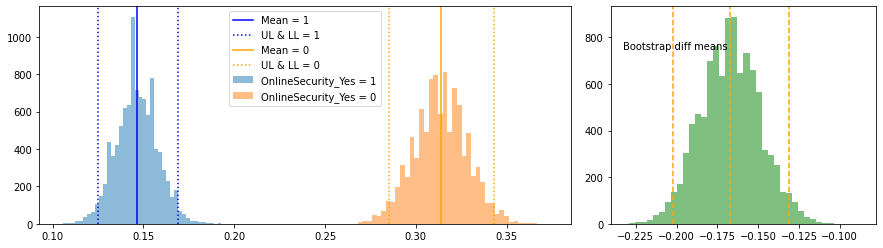

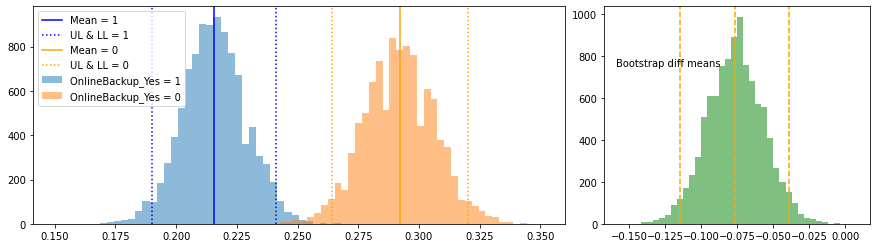

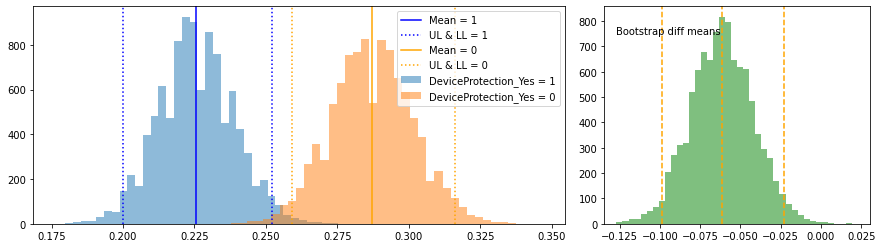

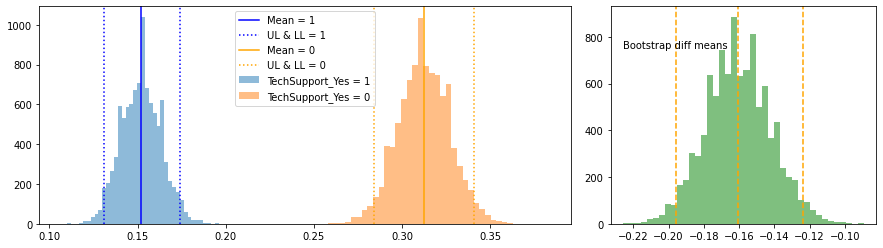

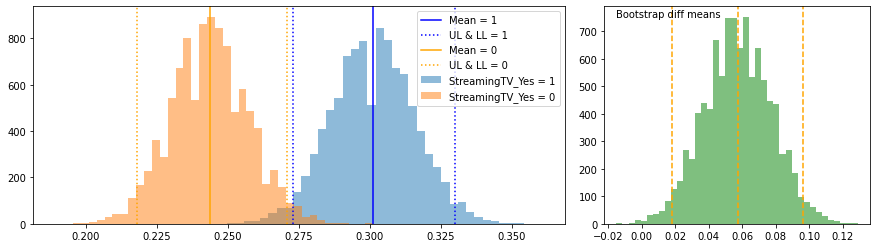

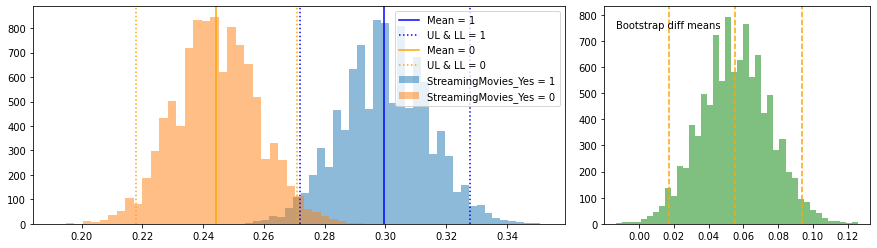

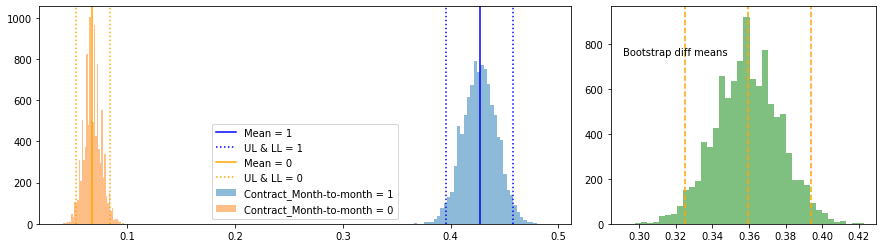

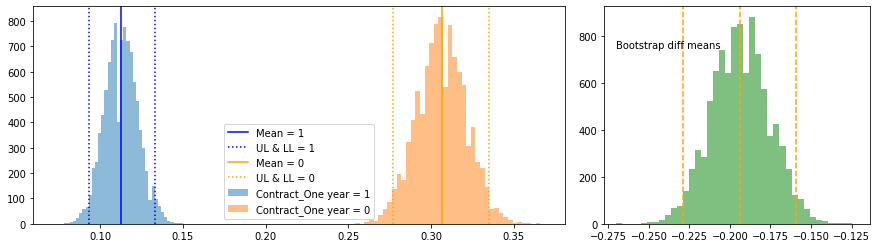

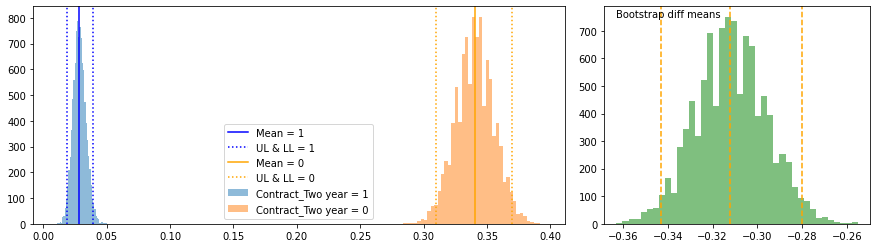

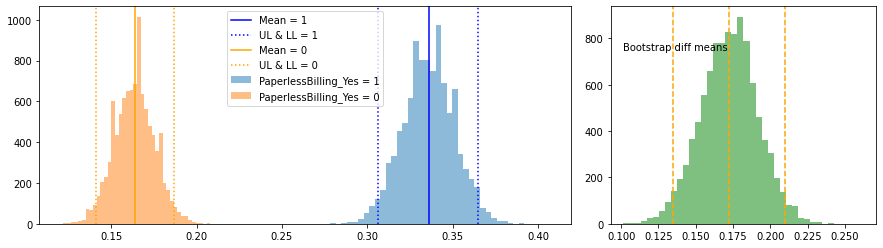

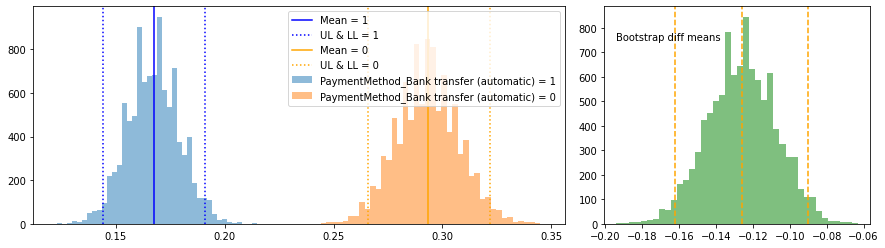

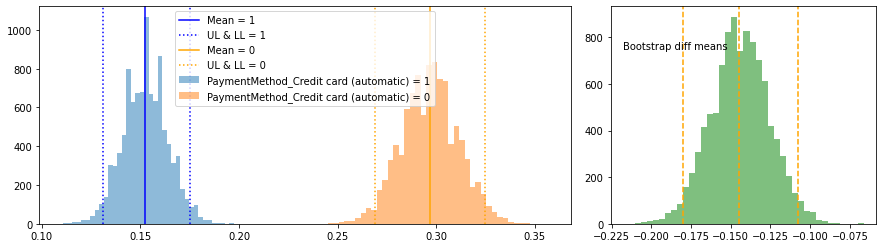

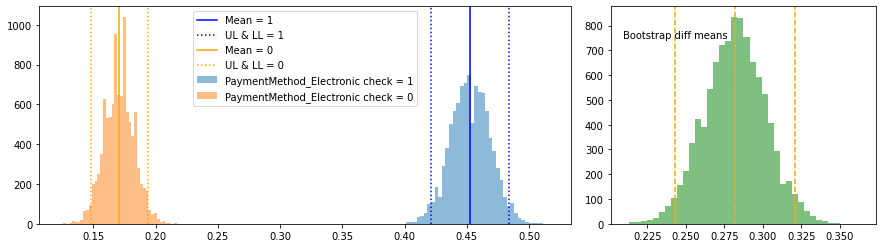

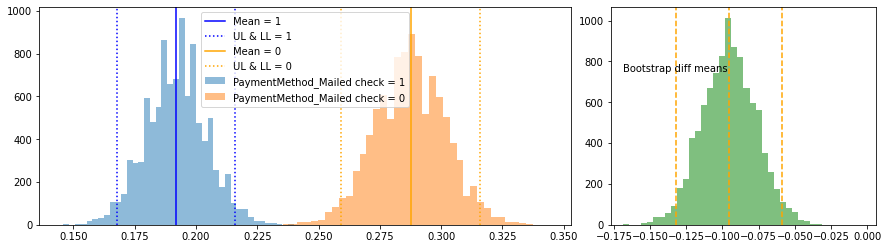

In [21]:
# Calculating the average churn for binary discrete variables 

estimate_1_list = []
estimate_0_list = []
diffs_list = []

mean_churn_1 = []
mean_churn_1_upper_limit = []
mean_churn_1_lower_limit = []

mean_churn_0 = []
mean_churn_0_upper_limit = []
mean_churn_0_lower_limit = []

diff_means = []
diff_means_upper_limit = []
diff_means_lower_limit = []

col_names =  list(df2.columns[0:-4])

for col_name in col_names:
    mean_churn = np.array(df2[df2[col_name] ==1]['Churn_Yes'])
    mean_churn2 = np.array(df2[df2[col_name] ==0]['Churn_Yes'])
    
    mean_churn_diff = mean_churn.mean() - mean_churn2.mean()
    
    for i in range(10000):
        estimate_1 = np.random.choice(mean_churn, 1000)
        estimate_0 = np.random.choice(mean_churn2, 1000)
        estimate_1_list.append(estimate_1.mean())
        estimate_0_list.append(estimate_0.mean())
        
        diff = estimate_1.mean() - estimate_0.mean()
        diffs_list.append(diff)
    
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=[15 , 4], gridspec_kw={'width_ratios': [10, 5], 'wspace': 0.1});
    ax3.hist(estimate_1_list, bins=40, alpha=0.5, label=f'{col_name} = 1')
    ax3.hist(estimate_0_list, bins=40, alpha=0.5, label=f'{col_name} = 0')
    ax3.axvline(mean_churn.mean(), color='blue', label='Mean = 1')
    ax3.axvline(np.percentile(estimate_1_list, 97.5), color='blue', linestyle='dotted', label = 'UL & LL = 1')
    ax3.axvline(np.percentile(estimate_1_list, 2.5), color='blue', linestyle='dotted')
    ax3.axvline(mean_churn2.mean(), color='orange', label='Mean = 0')
    ax3.axvline(np.percentile(estimate_0_list, 97.5), color='orange', linestyle='dotted', label = 'UL & LL = 0')
    ax3.axvline(np.percentile(estimate_0_list, 2.5), color='orange', linestyle='dotted')
    ax3.legend()
    
    ax4.hist(diffs_list, bins=40, alpha=0.5, label='difference', color='g')
    ax4.axvline(mean_churn_diff, color='orange', ls='--', label='Test Value')
    ax4.text(np.min(diffs_list), 750, 'Bootstrap diff means')
    ax4.axvline(np.percentile(diffs_list, 2.5), color='orange', ls='--')
    ax4.axvline(np.percentile(diffs_list, 97.5), color='orange', ls='--')
     
    mean_churn_1.append(mean_churn.mean())
    mean_churn_1_upper_limit.append(np.percentile(estimate_1_list, 97.5))
    mean_churn_1_lower_limit.append(np.percentile(estimate_1_list, 2.5))
    
    mean_churn_0.append(mean_churn2.mean())
    mean_churn_0_upper_limit.append(np.percentile(estimate_0_list, 97.5))
    mean_churn_0_lower_limit.append(np.percentile(estimate_0_list, 2.5))
    
    diff_means.append(mean_churn_diff.mean())
    diff_means_upper_limit.append(np.percentile(diffs_list, 97.5))
    diff_means_lower_limit.append(np.percentile(diffs_list, 2.5))
    
         
    estimate_1_list = []
    estimate_0_list = [] 
    diffs_list = []
    
list_values = {'col_names' :col_names, 'mean_churn_1' : mean_churn_1, 'mean_churn_1_upper_limit' : mean_churn_1_upper_limit,
               'mean_churn_1_lower_limit' : mean_churn_1_lower_limit, 'mean_churn_0' : mean_churn_0,
               'mean_churn_0_upper_limit' : mean_churn_0_upper_limit, 'mean_churn_0_lower_limit' : mean_churn_0_lower_limit,
               'diff_means' : diff_means, 'diff_means_upper_limit': diff_means_upper_limit,
               'diff_means_lower_limit' : diff_means_lower_limit}

estimation_table = pd.DataFrame(list_values)

estimation_table

<h1> Conclusions </h1>

> From the prevoius figures we can denote the follow:
> - There is a strong indications that the below feature has statistical significance when it comes to Average churn per attribute, is denoted by previous figures for bootstrapped samples of means distribution <br><br>
    1. `SeniorCitizen` <br>
    2. `Partner` <br>
    3. `Dependent` <br>
    4. `Internetservice_DSL` <br>
    5. `Internetservice_fiberoptic`<br>
    6.  `OnlineSecurity_Yes`
    6. `TechSupport` <br>
    7. `Contract_Month-to-month` <br>
    8. `Contract_One year` <br>
    9. `Contract_Two year` <br>
    10. `PaperlessBilling_Yes` <br>
    11. `PaymentMethod_Bank transfer (automatic)` <br>
    12. `PaymentMethod_Credit card (automatic)` <br>
    13. `PaymentMethod_Electronic check` <br>
    14. `PaymentMethod_Mailed check` <br>
    <br><br>
    
>- Features listed below doesn't show a strong indication for average churn per attribute
    1. `gender` <br>
    2. `PhoneService` <br>
    3. `MultipleLines` <br>
    4. `OnlineBackup` <br>
    5. `DeviceProtection` <br>
    6. `StreamingTV` <br>
    7. `StreamingMovies` <br><br>
>Thus we will do a separate focused test on the above attributes to conclude wither attributes of each parameter is significant or not

<h2> Hypothesis testing for significance </h2>
    
>Testing the hypothesis that the attributes of each parameters has the same effect on churn mean%
>
><center> $ H_{null}:  \mu_{1} - \mu_{0} = 0 $</center>
><center> $ H_{alternative}:  \mu_{1} - \mu_{0} \neq 0 $</center>
> 
><center> $ \alpha: 5\% $</center>

In [22]:
hypothesises_list = ['gender_Male', 'PhoneService_Yes', 'MultipleLines_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes']

In [23]:
def stat_test(df, col_name, number_of_trials, target):
    """
    Function to simulate statistical significance between 2 categories of a variable 
    and the noshow% affected by the categories
    """
    grouped_mean = df.groupby(col_name)[target].mean()
    
    significance_value = (grouped_mean[0] - grouped_mean[1])
    array1 = np.array(df[col_name][df[target] == 0])
    array2 = np.array(df[col_name][df[target] == 1])
    array_combined = np.concatenate((array1, array2))
    
    means_list_1 = []
    means_list_2 = []
    means_diff_list = []
    
    for i in range(number_of_trials):
        array_combined_perm = np.random.permutation(array_combined)
        array1_permutation = array_combined_perm[:len(array1)]
        array2_permutation = array_combined_perm[len(array2):]
        diff = array1_permutation.mean() - array2_permutation.mean()
        
        means_list_1.append(array1_permutation.mean())
        means_list_2.append(array2_permutation.mean())
        means_diff_list.append(diff)
        
    means_diff_array = np.array(means_diff_list)
    means_array_1 = np.array(means_list_1)  
    means_array_2 = np.array(means_list_2)
    
    return (means_diff_array, means_array_1, means_array_2, significance_value, col_name)

def hist_plot_sig_test(data1, data2, data3, line_value,bins=40, label_1="", label_2="", label_3="", name=""):
    
    """
    visualize the simualtion result
    """
    
    f, (axis1, axis2) = plt.subplots(1, 2, figsize=[15, 5], gridspec_kw={'width_ratios': [1, 1]})
    f.tight_layout()
    axis1.hist(data1, alpha=.5, bins=bins, edgecolor='lightgray', label=label_1);
    axis1.hist(data2, alpha=.5, bins=bins, edgecolor='lightgray', label=label_2);
    axis1.legend();
    
    axis2.hist(data3, bins=bins, edgecolor='lightgray', label=label_3);
    axis2.axvline(line_value, linestyle='dotted', c='g', label="Test Value", linewidth = 3)
    #plt.text(line_value * 1.05, 20, str(round(line_value,2)), color='r')#, rotation=90
    box_viz = plt.text(line_value, 10, str(round(line_value,2)),color='g')
    box_viz.set_bbox(dict(facecolor='w', alpha=0.9)) #, edgecolor='tab:bl
    
    axis2.axvline(np.percentile(data3, 2.5), c='y', label="Lower rejection bound", linewidth = 5, alpha = 0.7)
    axis2.axvline(np.percentile(data3,97.5), c='r', label="Upper rejection bound", linewidth = 5, alpha = 0.7)
 
    axis2.legend();


- For column "gender_Male" we fail to reject the null hypothesis
- For column "PhoneService_Yes" we reject the null hypothesis
- For column "MultipleLines_Yes" we reject the null hypothesis
- For column "OnlineBackup_Yes" we reject the null hypothesis
- For column "DeviceProtection_Yes" we reject the null hypothesis
- For column "StreamingTV_Yes" we reject the null hypothesis
- For column "StreamingMovies_Yes" we reject the null hypothesis


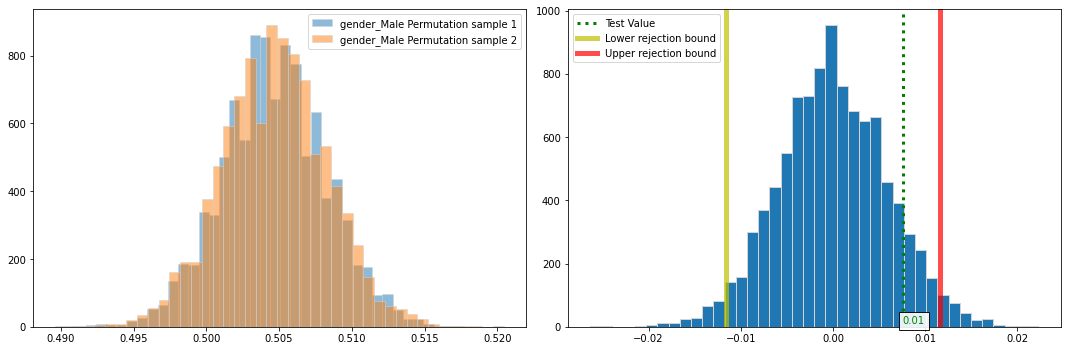

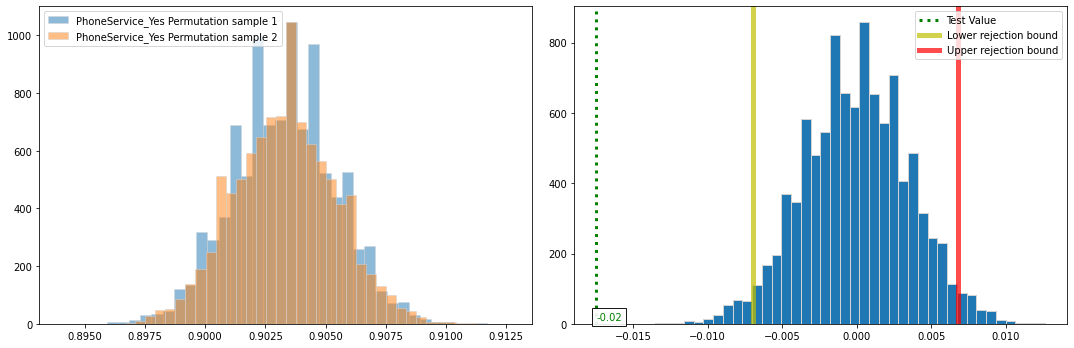

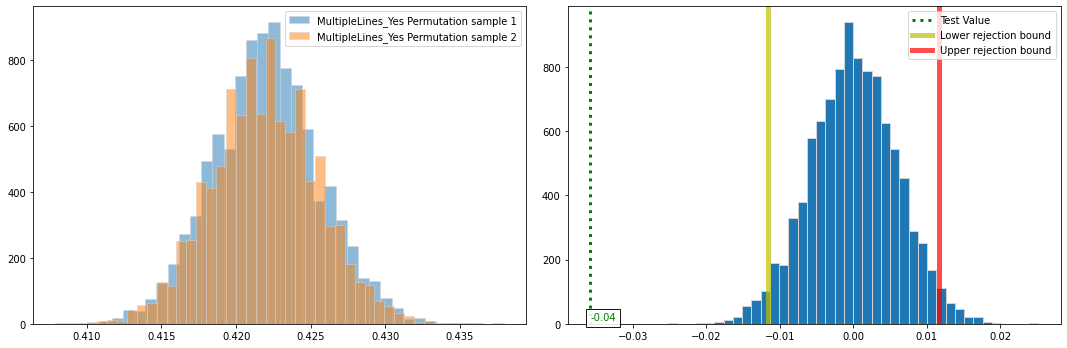

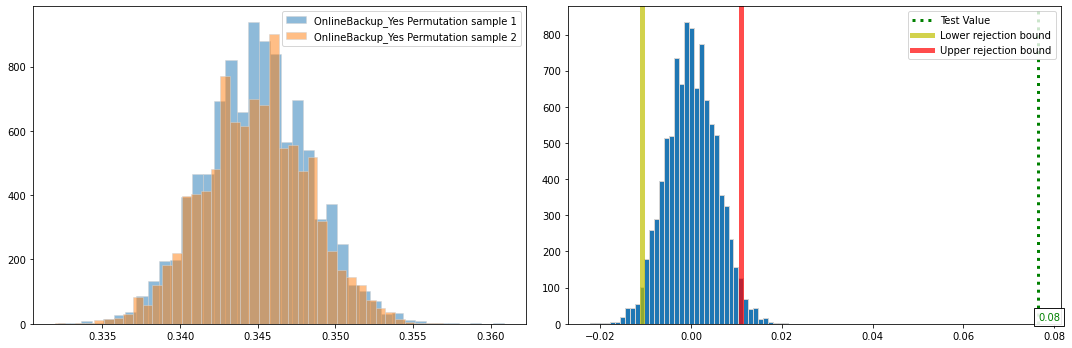

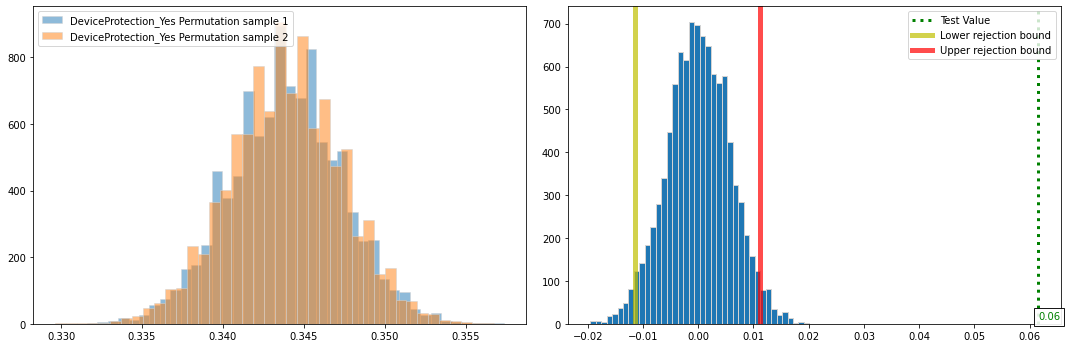

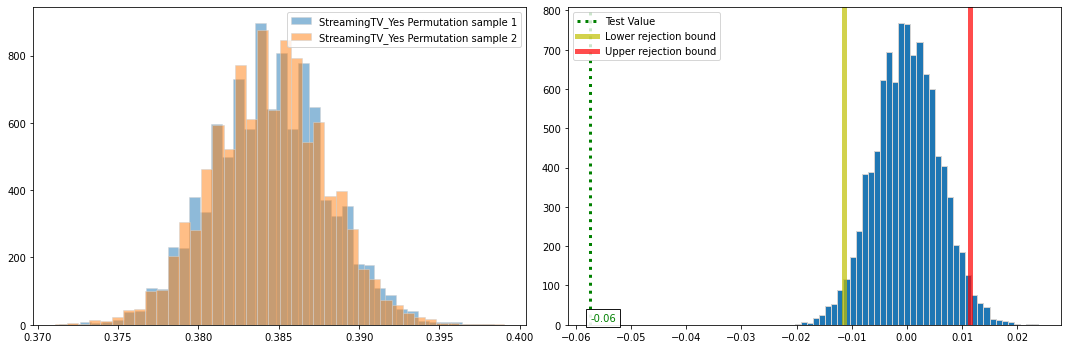

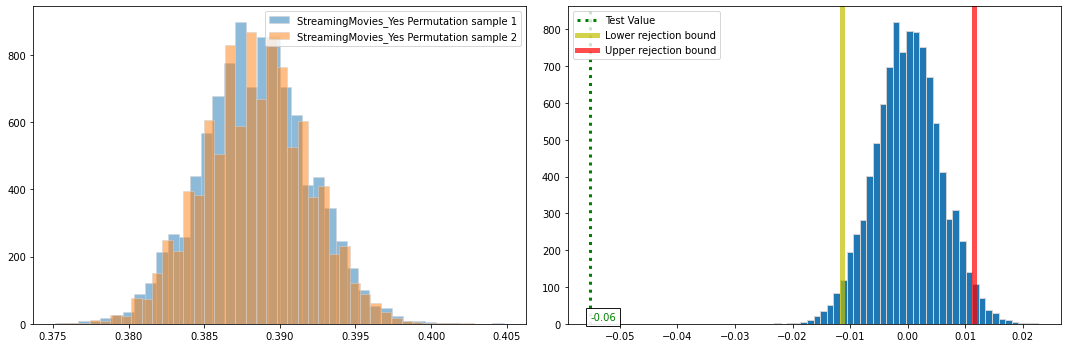

In [24]:
for i in hypothesises_list:  #(df, col_name, number_of_trials, target)
    diff_array, array_1, array_0, significance_value, colname = stat_test(df2, i, 10000, 'Churn_Yes')
    hist_plot_sig_test(array_1, array_0, diff_array, significance_value,
                       label_1=f"{colname} Permutation sample 1", label_2=f"{colname} Permutation sample 2", name=colname)
    
    if (significance_value > np.percentile(diff_array, 2.5) and significance_value < np.percentile(diff_array, 97.5)):
        print(f'- For column "{i}" we fail to reject the null hypothesis')
        print('=' * 60)
    else:
        print(f'- For column "{i}" we reject the null hypothesis')
        print('=' * 60)



,tenure,Churn_Yes
tenure,1.000000,-0.354049
Churn_Yes,-0.354049,1.000000


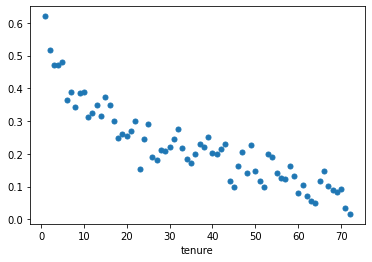

In [25]:
# Calculating the average churn for Continues variables variables 

df2.groupby('tenure')['Churn_Yes'].mean().plot(ls="", marker='o', markersize=5);

df2[['tenure', 'Churn_Yes']].corr()

-0.1863429836341185

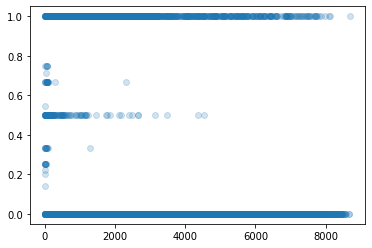

In [26]:
# Visualizing mean churn Vs. Total Charges
total_charg = pd.DataFrame(df2.groupby('TotalCharges')['Churn_Yes'].mean()).reset_index(drop=False)
total_charg
plt.scatter(total_charg['TotalCharges'], total_charg['Churn_Yes'], alpha=0.2);
total_charg.corr().iloc[1,0]


0.10273423253315554

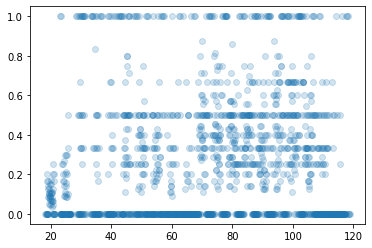

In [27]:
# Visualizing mean churn Vs. Monthly Charges 
month_charg = pd.DataFrame(df2.groupby('MonthlyCharges')['Churn_Yes'].mean()).reset_index(drop=False)
month_charg
plt.scatter(month_charg['MonthlyCharges'], month_charg['Churn_Yes'], alpha=0.2);

month_charg.corr().iloc[1,0]

In [28]:
#Cleaning data and renaming columns

df2['churn'] = df2['Churn_Yes']
col_names= ['male', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multipleLines', 'internet_dsl',
       'internet_fiber', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streamingtv',
       'streaming_movies', 'contract_month', 'contract_one_year',
       'contract_two_year', 'paperlessBilling',
       'payment_Bank_transfer_automatic',
       'payment_credit_automatic',
       'payment_electronic_check', 'payment_mailed_check',
       'Churn_Yes', 'tenure', 'monthly_charges', 'total_charges', 'churn']

df2.columns = col_names
df2.drop('Churn_Yes', inplace=True, axis=1)

df2.head()

,male,senior_citizen,partner,dependents,phone_service,multipleLines,internet_dsl,internet_fiber,online_security,online_backup,...,contract_two_year,paperlessBilling,payment_Bank_transfer_automatic,payment_credit_automatic,payment_electronic_check,payment_mailed_check,tenure,monthly_charges,total_charges,churn
0,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,1,29.85,29.85,0
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,34,56.95,1889.50,0
2,1,0,0,0,1,0,1,0,1,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,45,42.30,1840.75,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,2,70.70,151.65,1


<h1> Checking for collinearity </h1>

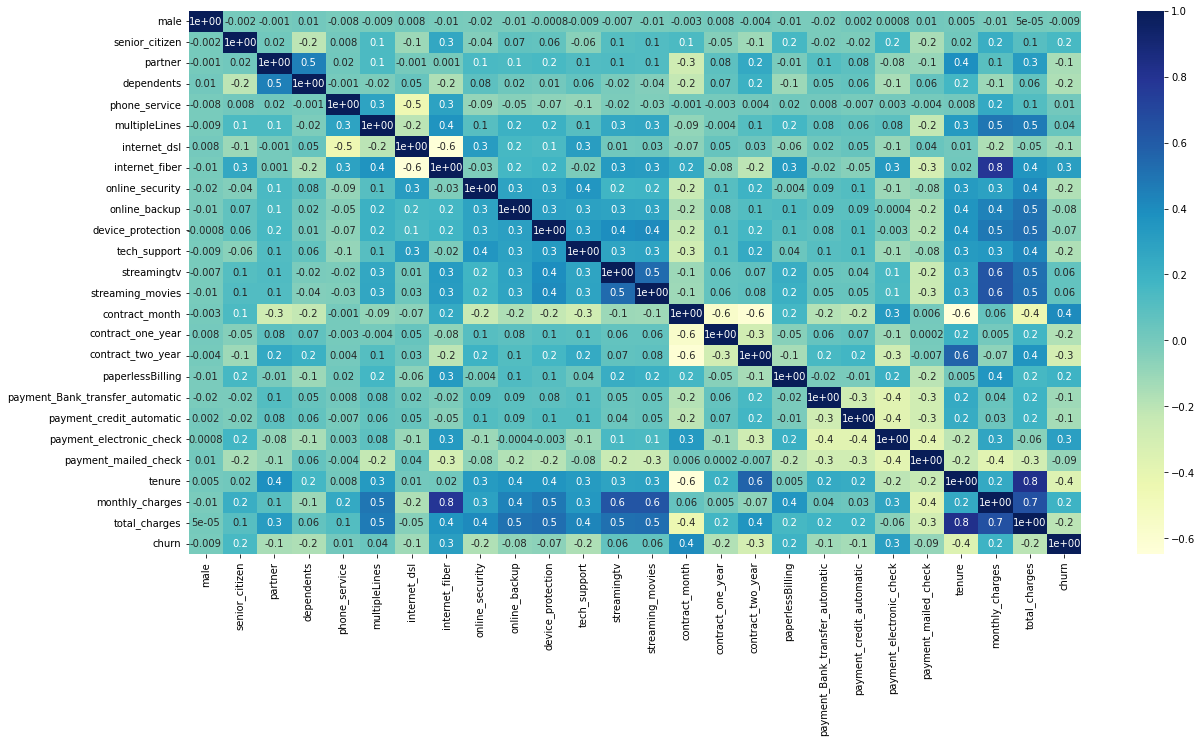

In [29]:
#checking for correlation
df_corr = df2.corr()

plt.figure(figsize=[20, 10]);
sns.heatmap(df_corr, cmap="YlGnBu", annot =True, fmt=".1"); #, annot=True


In [30]:
#converting correlation matrix to df 

corr_table = df_corr[abs(df_corr) >= 0.01].stack().reset_index()
corr_table = corr_table[corr_table['level_0'].astype(str)!=corr_table['level_1'].astype(str)]
corr_table['ordered-cols'] = corr_table.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_table = corr_table.drop_duplicates(['ordered-cols'])
#corr_table.drop(['ordered-cols'], axis=1, inplace=True)


corr_table['abs_corr_val'] = abs(corr_table[0])

corr_table.head()

,level_0,level_1,0,ordered-cols,abs_corr_val
1,male,dependents,0.010349,dependents-male,0.010349
2,male,internet_fiber,-0.011189,internet_fiber-male,0.011189
3,male,online_security,-0.016328,male-online_security,0.016328
4,male,online_backup,-0.013093,male-online_backup,0.013093
5,male,streaming_movies,-0.010105,male-streaming_movies,0.010105


In [31]:
corr_table = corr_table.sort_values(by=['abs_corr_val'], ascending = False)

,level_0,level_1,0,ordered-cols,abs_corr_val
525,tenure,total_charges,0.825880,tenure-total_charges,0.825880
167,internet_fiber,monthly_charges,0.787195,internet_fiber-monthly_charges,0.787195
550,monthly_charges,total_charges,0.651065,monthly_charges-total_charges,0.651065
339,contract_month,tenure,-0.649346,contract_month-tenure,0.649346
126,internet_dsl,internet_fiber,-0.641636,internet_dsl-internet_fiber,0.641636
291,streamingtv,monthly_charges,0.629668,monthly_charges-streamingtv,0.629668
317,streaming_movies,monthly_charges,0.627235,monthly_charges-streaming_movies,0.627235
334,contract_month,contract_two_year,-0.621933,contract_month-contract_two_year,0.621933
333,contract_month,contract_one_year,-0.570053,contract_month-contract_one_year,0.570053
383,contract_two_year,tenure,0.563801,contract_two_year-tenure,0.563801


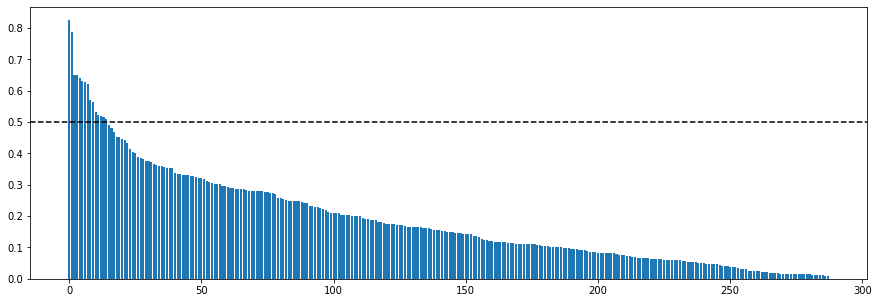

In [32]:
plt.figure(figsize= [15, 5]);
plt.bar(np.arange(corr_table.shape[0]), corr_table['abs_corr_val']);
plt.axhline(0.5, ls='--', c='k');


corr_table[corr_table['abs_corr_val'] > 0.50]

<h1> Conclusion from correlation matrix </h1> 

>1. Customer tenurity is highly correlated positively with total charges and inverse correlation with having the connection without a contract
2. Increase in monthly charges is highly correlated with having having fiber optic connection, online services and streaming services
3. The increase in monthly charges due to above mentioned reasons is highly correlated with  increase in total charges
4. Parameters `contract_month` and `contract_two_year`,`contract_one_year` are the inverse of each other as they are generated from the `pd.get_dummies()` function
5. Parameters `internet_fiber` and `internet_dsl` are sharing the same condition mentioned above in point no(4)

<h1> Testing for variance inflation </h1>

In [33]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Seperating predicting variables
features = list(df2.columns[:-1])

In [35]:
#Testing variance inflation factor 
"""
features.remove('internet_dsl')
features.remove('contract_month')
features.remove('payment_electronic_check')
features.remove('phone_service')
features.remove('contract_one_year')
#eatures.remove('tenure')
features.remove('monthly_charges')
features.remove('total_charges')
features.remove('male')
"""


# the independent variables set
df_features = df2 [features]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i)
                          for i in range(len(df_features.columns))]

vif_data

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,male,1.002106
1,senior_citizen,1.153220
2,partner,1.462988
3,dependents,1.381598
4,phone_service,34.893857
5,multipleLines,7.289761
6,internet_dsl,138.718618
7,internet_fiber,592.296922
8,online_security,6.338349
9,online_backup,6.796678


In [36]:
#Testing variance inflation factor 

features2 = list(df2.columns[:-1])

features2.remove('payment_Bank_transfer_automatic')
features2.remove('monthly_charges')
features2.remove('contract_month')
features2.remove('total_charges')
features2.remove('tenure')



# the independent variables set
df_features = df2 [features2]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i)
                          for i in range(len(df_features.columns))]

vif_data.sort_values(by='VIF', ascending= False)

,feature,VIF
17,payment_credit_automatic,0.292042
11,tech_support,0.250879
4,phone_service,0.233770
8,online_security,0.214140
14,contract_one_year,0.213399
15,contract_two_year,0.196717
6,internet_dsl,0.175372
13,streaming_movies,0.166846
1,senior_citizen,0.141046
12,streamingtv,0.139234


<h1> Building Prediction model - Logistic Regression </h1>

In [37]:
#Import Logistic regression necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [38]:
# spliting the data into 2 variables x, y
x = df2.drop('churn', axis=1)

#x = x[features2]
y = df2['churn']

In [39]:
# Spliting the data to 4 datasets from training and evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [40]:
# Instantiate Logistic regression model
logreg = LogisticRegression(solver='liblinear')

In [41]:
# Fitting the training data to the model
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [42]:
# Coeffecients of variables
logreg.coef_

array([[-1.64115637e-02,  1.62059197e-01,  3.91007860e-02,
        -2.83336370e-01, -1.08967458e+00,  2.21468403e-01,
         1.99419873e-01,  5.01859461e-01, -4.94948624e-01,
        -3.07757786e-01, -1.12310074e-01, -5.38474013e-01,
        -1.27078095e-03,  3.22195777e-02,  4.28537570e-01,
        -2.47300397e-01, -8.62986222e-01,  2.95741979e-01,
        -2.89801782e-01, -2.71513385e-01,  1.00874349e-01,
        -2.21308232e-01, -6.00527586e-02,  1.90924375e-02,
         3.31466265e-04]])

In [43]:
# Making a predication on the test set 
y_pred = logreg.predict(x_test)

In [44]:
y_pred_proba = logreg.predict_proba(x_test)[:, 1]

In [45]:
pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'probability': y_pred_proba})

In [46]:
result_list = []
for idx, value in pred_df.iterrows():
    #print(value[2])
    if (value[0] == 1 and value[1] == 1):
        result = 'True Positive'
        #result_list.append(result)
    elif (value[0] == 0 and value[1] == 0):
        result = 'True Negative'
    elif (value[0] == 0 and value[1] == 1):
        result = 'False Positive'
    else:
        result = 'False Negative'
    
    result_list.append(result)
    

In [47]:
pred_df['category'] = result_list

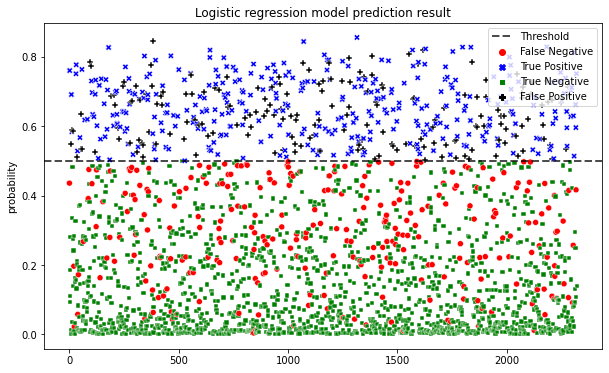

In [48]:
plt.figure(figsize=[10, 6])

sns.scatterplot(x= np.arange(pred_df.shape[0]), y =pred_df['probability'], 
                hue= pred_df['category'], style=pred_df['category'], palette = ['red', 'blue', 'green', 'black']); 
plt.axhline(0.5, label = 'Threshold', lw=2, alpha=0.7, c='k', ls='--');
plt.title('Logistic regression model prediction result')
plt.legend();

In [49]:
pred_df.groupby('category').count()

pred_df['category'].value_counts(normalize='True')

True Negative     0.654028
True Positive     0.148212
False Negative    0.117622
False Positive    0.080138
Name: category, dtype: float64

In [50]:
# Printing the classification report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1704
           1       0.65      0.56      0.60       617

    accuracy                           0.80      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.79      0.80      0.80      2321



In [51]:
# Checking Model accuracy score
accuracy_score(y_test, y_pred)

0.8022404136148212

In [52]:
# Model Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1518,  186],
       [ 273,  344]])